<a href="https://colab.research.google.com/github/aniket2702/Python/blob/master/NaiveBayesClassifier_T218047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AI ESE Practical 2021-22
***
#### *Name- Aniket Sharma*
#### *Roll No.- 192*
#### *Seat No.- T218047*
#### *PRN No.- 0120190423*


# Naive Bayes Classifer for Pima Indians Diabetes Database


In [ ]:
import pandas as pd
import numpy as np 
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

##### Dataset
-- The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (in years)
- Outcome: Class variable (0 or 1)

###### Stastical Summary

In [ ]:
    dataset = pd.read_csv('diabetes.csv')
    dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#checking for null values
print(dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
dataset.mean() #calculating mean of all columns

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

##### c. Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import math
from scipy.stats import norm, skew

import warnings 
warnings.filterwarnings('ignore')

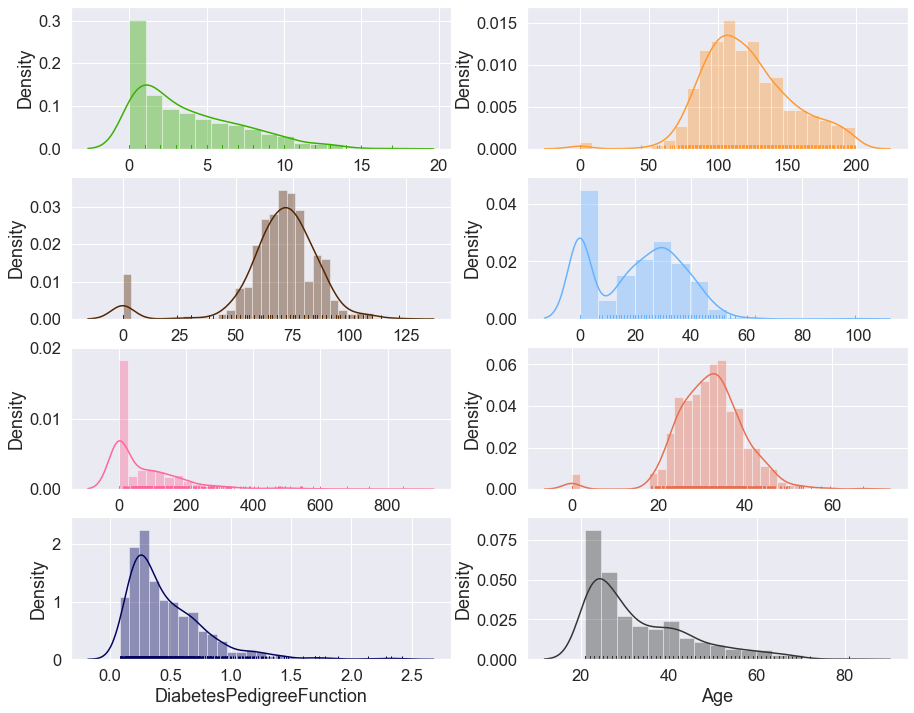

In [ ]:
#frequency distribution of data
fig, axs = plt.subplots(4, 2, figsize=(15,12))
axs = axs.flatten()
sns.distplot(dataset['Pregnancies'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(dataset['Glucose'],rug=True,color='#FF9933',ax=axs[1])
sns.distplot(dataset['BloodPressure'],rug=True,color='#522500',ax=axs[2])
sns.distplot(dataset['SkinThickness'],rug=True,color='#66b3ff',ax=axs[3])
sns.distplot(dataset['Insulin'],rug=True,color='#FF6699',ax=axs[4])
sns.distplot(dataset['BMI'],color='#e76f51',rug=True,ax=axs[5])
sns.distplot(dataset['DiabetesPedigreeFunction'],color='#03045e',rug=True,ax=axs[6])
sns.distplot(dataset['Age'],rug=True,color='#333533',ax=axs[7])
plt.show()

<AxesSubplot:>

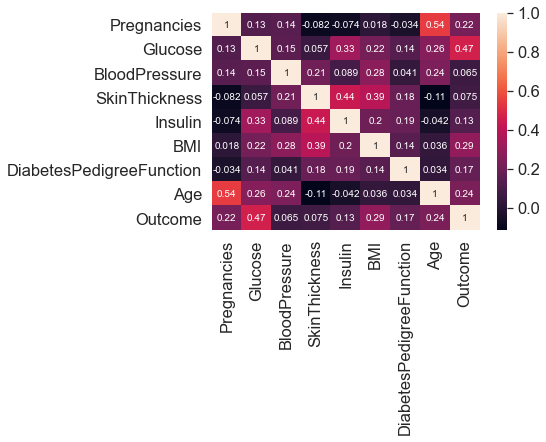

In [ ]:
sns.heatmap(dataset.corr(),annot=True) #showing correlaton of data

Text(0.5, 1.0, 'Diabetes Patient')

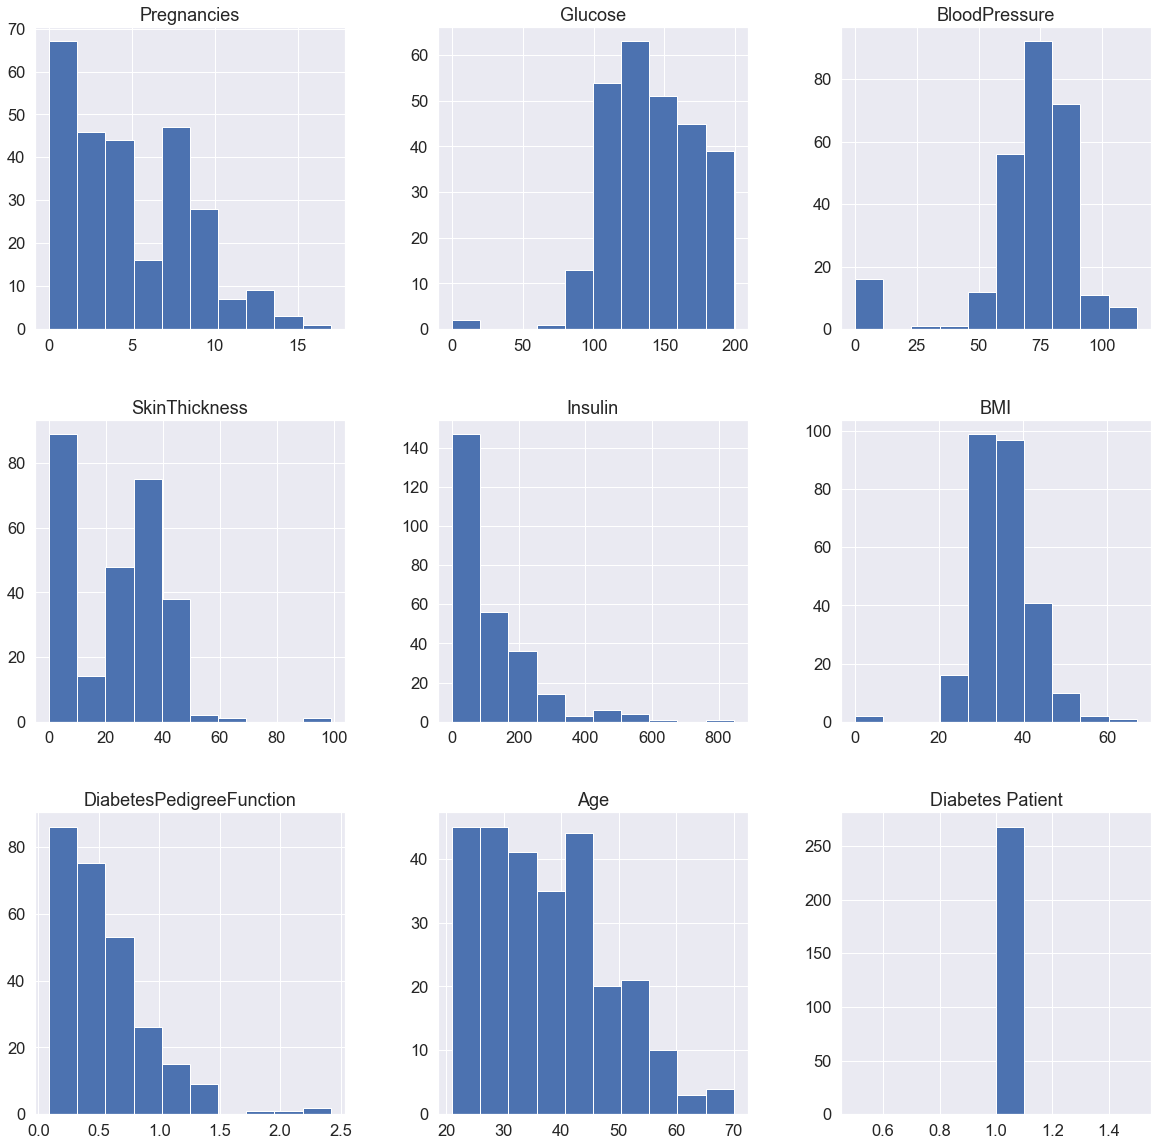

In [ ]:
#data visualization of diabetic patients
p = dataset[dataset['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

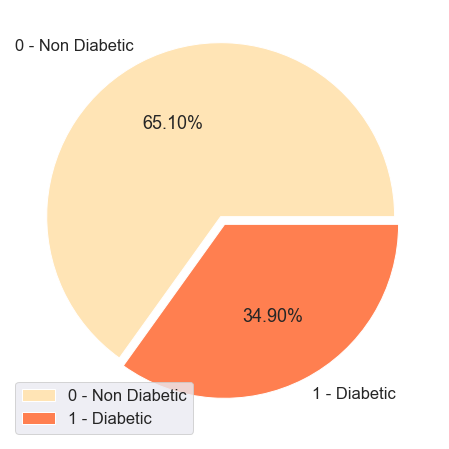

In [ ]:
#percentage of diabetics and non-diabetics
plt.figure(figsize=(8,8))
pieC = dataset['Outcome'].value_counts()
explode = (0.05, 0)
colors = ['moccasin', 'coral']
labels = ['0 - Non Diabetic', '1 - Diabetic']
sns.set(font_scale = 1.5)
plt.pie(pieC, labels = ('0 - Non Diabetic', '1 - Diabetic'), autopct = "%.2f%%", explode = explode, colors = colors)
plt.legend(labels, loc = 'lower left')

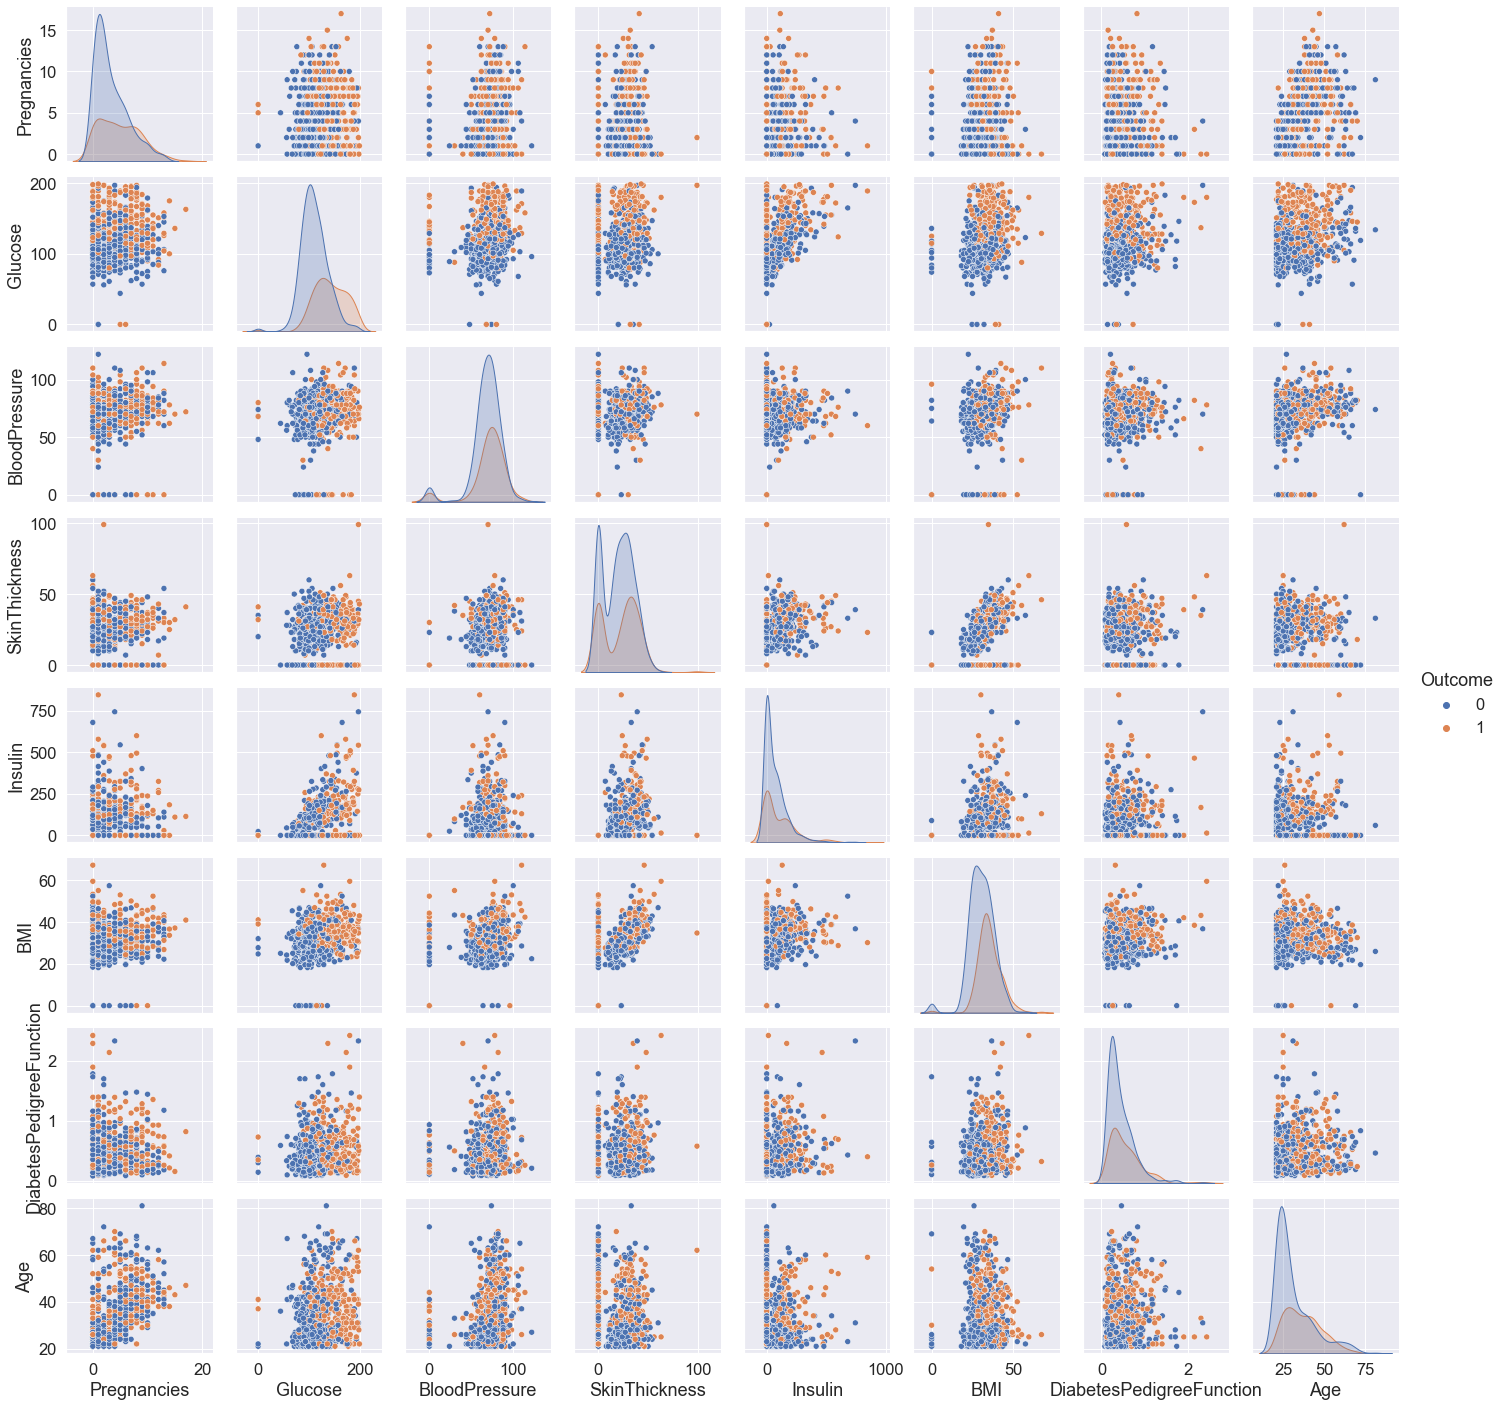

In [ ]:
sns.pairplot(dataset, hue="Outcome")
plt.show()

### Needed Methods for Naive Bayes Classifier

In [ ]:
#function to generate predictions, 1/0
def makePrediction(pPredict, nPredict):
    prediction = [] 
    
    for i in range(len(pPredict)):
        if pPredict[i]>nPredict[i]:
            prediction.append(1)
        else:
            prediction.append(0)
            
    return prediction

In [ ]:
#accuracy of the model, using confusion matrix
def getAccuracy(prediction, testC):
    
    trueP, trueN, falseP, falseN = 0, 0, 0, 0
    
    for i in range(len(prediction)):
        if prediction[i] == testC[i]:
            if prediction[i] == 1:
                trueP +=1
            else:
                trueN += 1
        else:
            if prediction[i] == 1:
                falseP += 1
            else:
                falseN += 1
                
    
    accuracy = ((trueP + trueN)/(len(prediction)))*100
    precision = trueP /float(trueP + falseP)
    recall = trueP/float(trueP + falseN)
    

    print("TP",trueP,"TN",trueN)
    print("FP",falseP,"FN", falseN)
    
    return  [accuracy, precision, recall]

In [ ]:
#to calculate likelihood
def Calculate(meanAndVariance, dataset, prior):
    
    # Convert dataframe into a list
    dataList  = dataset.values.tolist()
    # To store predicts of all rows
    predict = []
    
    for i in range(len(dataList)):
        p = 1
        for j in range(len(dataList[i])):
            #naive bayes formula for continious variables
            exponent = math.exp(-(math.pow(dataList[i][j]-meanAndVariance[j][0],2)/(2*math.pow(meanAndVariance[j][1],2))))
            p = p * (1/(math.sqrt(2*math.pi) *meanAndVariance[j][1])) * exponent
        predict.append((p*prior))
            
    return predict
    

In [ ]:
def variance(dataset, MV ):
    
    #Convert dataframe into a list since it's easier when calculating the variance
    DataList  = dataset.values.tolist()
    
    #Calculate variance for features of positive class
    for i in range(8):
        # To calculate deviations of each data point
        d = 0
        
        for j in range(len(DataList)):
            d += pow((DataList[j][i] - MV[i][0]),2)
        
        d = (d/float((len(dataset["Outcome"]))))
        MV[i].append(math.sqrt(d))
        
    
    return MV

In [ ]:
def mean(datasetP, datasetN):
    
    #Get mean and variance for both positive and negative class
    positiveMV = []
    negativeMV = []
    
    #Traverse columns
    for column in datasetP:
        
        # break the loop as no need to calculate the mean of the class
        if column == 'Outcome':
            break
            
        meanVictorP = [sum(datasetP[column])/(len(datasetP[column]))]
        positiveMV.append(meanVictorP)
        
        meanVictorN = [sum(datasetN[column])/(len(datasetN[column]))]
        negativeMV.append(meanVictorN)
        
    return [positiveMV, negativeMV]

In [ ]:
def splitByClass(dataset):
    
    #Split by positive class
    positiveT = dataset[dataset['Outcome'] == 1]
    
    #Split by negative class
    negativeT = dataset[dataset['Outcome'] == 0]
    
    return [positiveT, negativeT]
    

In [ ]:
def splitData(dataset):
    
    #The dataset split for the test is 20% and for the training is 80%
     
    #Defining number of rows for the testing set
    testingRows = math.floor((len(dataset)*20)/100)
    
    #Splitting the data into testing set. The rest will be the training set.
    test = dataset.iloc[:testingRows,:]
    train = dataset.iloc[testingRows:,:] 
    
    return [test, train]

##### Data Preprocessing

In [ ]:
print(dataset.isnull().sum()) #to check for NaN values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#scaling the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(dataset)
print(scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  1.94372388 -0.26394125 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.1597866  -0.47073225 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.8730192   0.04624525 ... -0.47378505 -0.87137393
  -0.73212021]]


###### Shuffling the dataset & Split the dataset into test and training

In [ ]:

    dataset = dataset.iloc[np.random.permutation(len(dataset))] 
    test, train = splitData(dataset)
    print("No. of testing rows: ", len(test['Outcome']))
    print("No. of training rows: ", len(train['Outcome']))

No. of testing rows:  153
No. of training rows:  615


###### Split training dataset by class (positive and negative)
###### Finding the prior probability of both classes. 

In [ ]:
    positiveT, negativeT = splitByClass(train)
    
    priorP = len(positiveT['Outcome'])/len(train['Outcome'])   # priorP for the positive class
    priorN = len(negativeT['Outcome'])/len(train['Outcome'])   # priorN for the negative one
    
    print("Prior probability of 'tested negative(non-diabetic): ", priorN)
    print("Prior probability of 'tested positive(diabetic): ", priorP)

Prior probability of 'tested negative(non-diabetic):  0.6634146341463415
Prior probability of 'tested positive(diabetic):  0.33658536585365856


###### - Get mean and variance for both classes
###### - Split the feature and class of testing set
###### - Find prediction on testing set

In [ ]:

    #mean
    positiveMV , negativeMV = mean(positiveT, negativeT)
    #variance
    positiveMV = variance(positiveT,positiveMV)
    negativeMV = variance(negativeT, negativeMV)
    

    testF = test.iloc[:, 0:8]
    testC = test.iloc[:,-1]

    #find predicts of both classes
    pPredict = Calculate(positiveMV, testF, priorP)
    nPredict = Calculate(negativeMV, testF, priorN)
    #Make predections
    prediction = makePrediction(pPredict, nPredict)
    print("Prediction result:\n\n",prediction )


Prediction result:

 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]


######  Calculate accuracy, precision and recall

- Accuracy = TP+TN/TP+FP+FN+TN
- Precision = TP/TP+FP
- Recall = TP/TP+FN


In [ ]:
    print("Confusion Matrix\n")
    accuracy, precision, recall = getAccuracy(prediction, testC.values.tolist())
    print("\naccuracy: ",accuracy,"%\nprecision: ",precision,"\nrecall: ",recall)


Confusion Matrix

TP 45 TN 75
FP 17 FN 16

accuracy:  78.43137254901961 %
precision:  0.7258064516129032 
recall:  0.7377049180327869


#####  Comparative Analysis
###### NB(from scratch) vs GaussianNB vs kNN

In [ ]:
#gaussianNB using sklearn
from sklearn.model_selection import train_test_split
x=dataset.drop("Outcome", axis=1)
y=dataset[["Outcome"]]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [ ]:
print(y_pred)
from sklearn import metrics
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

[0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0]
accuracy:  0.7532467532467533


In [ ]:
#k nearest neighbours using sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
print("Accuracy: ",knn.score(x_test,y_test))

Accuracy:  0.7012987012987013


### we can observe , that the accuracies of the models is as follows:
- Naive Bayes Classifier(from Scratch) = 75.16339869281046 %
- Gaussian Naive Bayes Classifier(sklearn) = 76.62337662337663 %
- kNN(sklearn) = 73.16017316017316 %